IMPORT LIBRARY

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr

In [31]:
#This allow notebook can display all dataframe (adding scroll bar) when it too large
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

IMPORT DATA

In [32]:
detail = pd.read_csv("CustomerChurnData_description.csv")
detail

,Variable,Description
0,AccountID,account unique identifier
1,Churn,account churn flag (Target)
2,Tenure,Tenure of account
3,City_Tier,Tier of primary customer's city
4,CC_Contacted_L12m,How many times all the customers of the account has contacted customer care in last 12months
5,Payment,Preferred Payment mode of the customers in the account
6,Gender,Gender of the primary customer of the account
7,Service_Score,Satisfaction score given by customers of the account on service provided by company
8,Account_user_count,Number of customers tagged with this account
9,account_segment,Account segmentation on the basis of spend


The dataframe has 19 columns with description as above. We will continue to read the data given in CustomerChurnData.csv file

In [33]:
df = pd.read_csv("CustomerChurnData.csv")
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [34]:
df.drop('AccountID', axis='columns', inplace=True)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [35]:
print("Number of columns:", df.shape[1], "\nNumber of rows:", df.shape[0])

Number of columns: 18 
Number of rows: 11260


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [37]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [38]:
def unique_value(df):
    print("-----------Unique values in dataframe-----------")
    features = df.columns
    for feature in features:
        values = df[feature].unique().reshape(-1)
        print(feature + ":", end=" ")
        for i in range(len(values) - 1):
            print(values[i], end="; ")
        print(values[-1])
        print()

In [39]:
unique_value(df)

-----------Unique values in dataframe-----------
Churn: 1; 0

Tenure: 4; 0; 2; 13; 11; #; 9; 99; 19; 20; 14; 8; 26; 18; 5; 30; 7; 1; 23; 3; 29; 6; 28; 24; 25; 16; 10; 15; 22; nan; 27; 12; 21; 17; 50; 60; 31; 51; 61

City_Tier: 3.0; 1.0; nan; 2.0

CC_Contacted_LY: 6.0; 8.0; 30.0; 15.0; 12.0; 22.0; 11.0; 9.0; 31.0; 18.0; 13.0; 20.0; 29.0; 28.0; 26.0; 14.0; 10.0; 25.0; 27.0; 17.0; 23.0; 33.0; 19.0; 35.0; 24.0; 16.0; 32.0; 21.0; nan; 34.0; 5.0; 4.0; 126.0; 7.0; 36.0; 127.0; 42.0; 38.0; 37.0; 39.0; 40.0; 41.0; 132.0; 43.0; 129.0

Payment: Debit Card; UPI; Credit Card; Cash on Delivery; E wallet; nan

Gender: Female; Male; F; nan; M

Service_Score: 3.0; 2.0; 1.0; nan; 0.0; 4.0; 5.0

Account_user_count: 3; 4; nan; 5; 2; @; 1; 6

account_segment: Super; Regular Plus; Regular; HNI; Regular +; nan; Super Plus; Super +

CC_Agent_Score: 2.0; 3.0; 5.0; 4.0; nan; 1.0

Marital_Status: Single; Divorced; Married; nan

rev_per_month: 9; 7; 6; 8; 3; 2; 4; 10; 1; 5; +; 130; nan; 19; 139; 102; 120; 138; 12

In [40]:
customers = df.copy()

Filling all specical character and NaN value in dataframe by 'NOT_FILL' value

In [41]:
customers['Tenure'] = customers['Tenure'].replace('#', 'NOT_FILL')
customers['Tenure'] = customers['Tenure'].replace(np.nan, 'NOT_FILL')

customers['City_Tier'] = customers['City_Tier'].replace(np.nan, 'NOT_FILL')

customers['CC_Contacted_LY'] = customers['CC_Contacted_LY'].replace(np.nan, 'NOT_FILL')

customers['Payment'] = customers['Payment'].replace(np.nan, 'NOT_FILL')

customers['Gender'] = customers['Gender'].replace('F', 'Female')
customers['Gender'] = customers['Gender'].replace('M', 'Male')
customers['Gender'] = customers['Gender'].replace(np.nan, 'NOT_FILL')

customers['Service_Score'] = customers['Service_Score'].replace(np.nan, 'NOT_FILL')

customers['Account_user_count'] = customers['Account_user_count'].replace('@', 'NOT_FILL')
customers['Account_user_count'] = customers['Account_user_count'].replace(np.nan, 'NOT_FILL')

customers['account_segment'] = customers['account_segment'].replace('Regular +', 'Regular Plus')
customers['account_segment'] = customers['account_segment'].replace('Super +', 'Super Plus')
customers['account_segment'] = customers['account_segment'].replace(np.nan, 'NOT_FILL')

customers['CC_Agent_Score'] = customers['CC_Agent_Score'].replace(np.nan, 'NOT_FILL')

customers['Marital_Status'] = customers['Marital_Status'].replace(np.nan, 'NOT_FILL')

customers['rev_per_month'] = customers['rev_per_month'].replace('+', 'NOT_FILL')
customers['rev_per_month'] = customers['rev_per_month'].replace(np.nan, 'NOT_FILL')

customers['Complain_ly'] = customers['Complain_ly'].replace(np.nan, 'NOT_FILL')

customers['rev_growth_yoy'] = customers['rev_growth_yoy'].replace('$', 'NOT_FILL')


customers['coupon_used_for_payment'] = customers['coupon_used_for_payment'].replace('#', 'NOT_FILL')
customers['coupon_used_for_payment'] = customers['coupon_used_for_payment'].replace('$', 'NOT_FILL')
customers['coupon_used_for_payment'] = customers['coupon_used_for_payment'].replace('*', 'NOT_FILL')

customers['Day_Since_CC_connect'] = customers['Day_Since_CC_connect'].replace('$', 'NOT_FILL')
customers['Day_Since_CC_connect'] = customers['Day_Since_CC_connect'].replace(np.nan, 'NOT_FILL')

customers['cashback'] = customers['cashback'].replace('$', 'NOT_FILL')
customers['cashback'] = customers['cashback'].replace(np.nan, 'NOT_FILL')

customers['Login_device'] = customers['Login_device'].replace('&&&&', 'NOT_FILL')
customers['Login_device'] = customers['Login_device'].replace(np.nan, 'NOT_FILL')

In [42]:
unique_value(customers)

-----------Unique values in dataframe-----------
Churn: 1; 0

Tenure: 4; 0; 2; 13; 11; NOT_FILL; 9; 99; 19; 20; 14; 8; 26; 18; 5; 30; 7; 1; 23; 3; 29; 6; 28; 24; 25; 16; 10; 15; 22; 27; 12; 21; 17; 50; 60; 31; 51; 61

City_Tier: 3.0; 1.0; NOT_FILL; 2.0

CC_Contacted_LY: 6.0; 8.0; 30.0; 15.0; 12.0; 22.0; 11.0; 9.0; 31.0; 18.0; 13.0; 20.0; 29.0; 28.0; 26.0; 14.0; 10.0; 25.0; 27.0; 17.0; 23.0; 33.0; 19.0; 35.0; 24.0; 16.0; 32.0; 21.0; NOT_FILL; 34.0; 5.0; 4.0; 126.0; 7.0; 36.0; 127.0; 42.0; 38.0; 37.0; 39.0; 40.0; 41.0; 132.0; 43.0; 129.0

Payment: Debit Card; UPI; Credit Card; Cash on Delivery; E wallet; NOT_FILL

Gender: Female; Male; NOT_FILL

Service_Score: 3.0; 2.0; 1.0; NOT_FILL; 0.0; 4.0; 5.0

Account_user_count: 3; 4; NOT_FILL; 5; 2; 1; 6

account_segment: Super; Regular Plus; Regular; HNI; NOT_FILL; Super Plus

CC_Agent_Score: 2.0; 3.0; 5.0; 4.0; NOT_FILL; 1.0

Marital_Status: Single; Divorced; Married; NOT_FILL

rev_per_month: 9; 7; 6; 8; 3; 2; 4; 10; 1; 5; NOT_FILL; 130; 19; 13

In [43]:
customers.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [44]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Churn                    11260 non-null  int64 
 1   Tenure                   11260 non-null  object
 2   City_Tier                11260 non-null  object
 3   CC_Contacted_LY          11260 non-null  object
 4   Payment                  11260 non-null  object
 5   Gender                   11260 non-null  object
 6   Service_Score            11260 non-null  object
 7   Account_user_count       11260 non-null  object
 8   account_segment          11260 non-null  object
 9   CC_Agent_Score           11260 non-null  object
 10  Marital_Status           11260 non-null  object
 11  rev_per_month            11260 non-null  object
 12  Complain_ly              11260 non-null  object
 13  rev_growth_yoy           11260 non-null  object
 14  coupon_used_for_payment  11260 non-nul

In [45]:
categorical_cols = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']
numerical_cols = ['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']

In [46]:
customers[numerical_cols] = customers[numerical_cols].replace('NOT_FILL', np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
customers[numerical_cols] = imputer.fit_transform(customers[numerical_cols])

In [47]:
customers.dtypes

Churn                        int64
Tenure                     float64
City_Tier                   object
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score               object
Account_user_count         float64
account_segment             object
CC_Agent_Score              object
Marital_Status              object
rev_per_month              float64
Complain_ly                 object
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [48]:
def _bar_plot(df, feature):
    pd.DataFrame(df[feature].value_counts()).plot(kind='bar', figsize=(30, 3))

In [49]:
customers['City_Tier'] = customers['City_Tier'].replace([1.0, 2.0, 3.0], ['tier_1', 'tier_2', 'tier_3'])

customers['Service_Score'] = customers['Service_Score'].replace([0.0, 1.0, 2.0], 'Bad')
customers['Service_Score'] = customers['Service_Score'].replace(3.0, 'OK')
customers['Service_Score'] = customers['Service_Score'].replace([4.0, 5.0], 'Good')

customers['CC_Agent_Score'] = customers['CC_Agent_Score'].replace([0.0, 1.0, 2.0], 'Bad')
customers['CC_Agent_Score'] = customers['CC_Agent_Score'].replace(3.0, 'OK')
customers['CC_Agent_Score'] = customers['CC_Agent_Score'].replace([4.0, 5.0], 'Good')

customers['Complain_ly'] = customers['Complain_ly'].replace([0.0, 1.0], ['No', 'Yes'])

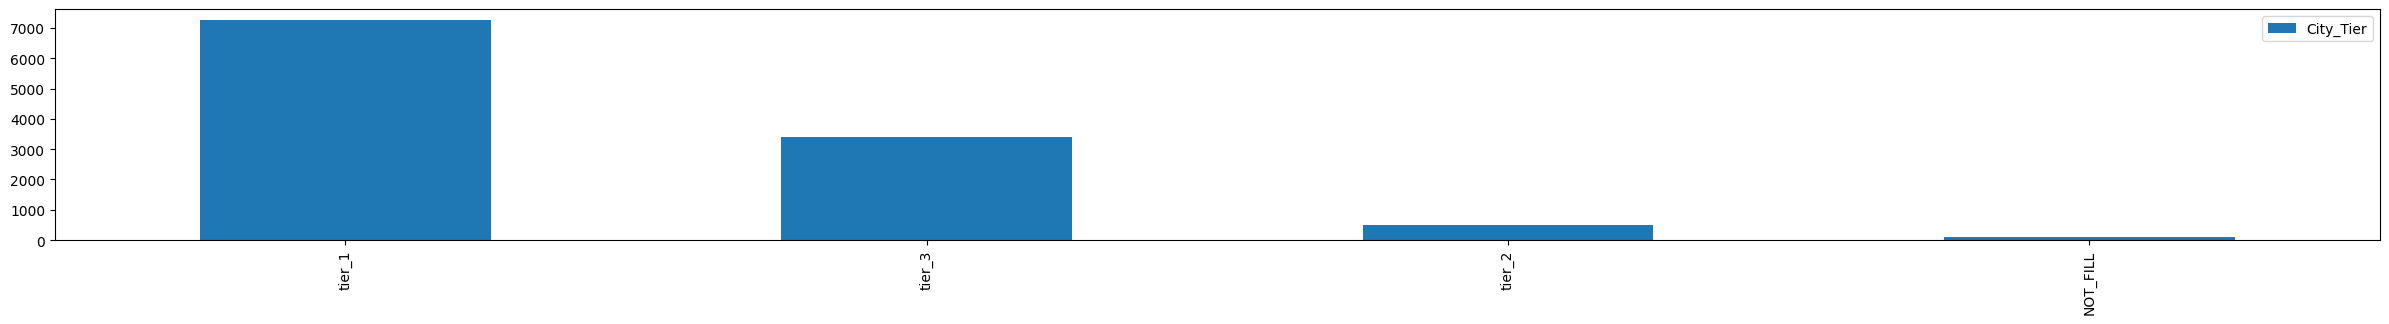

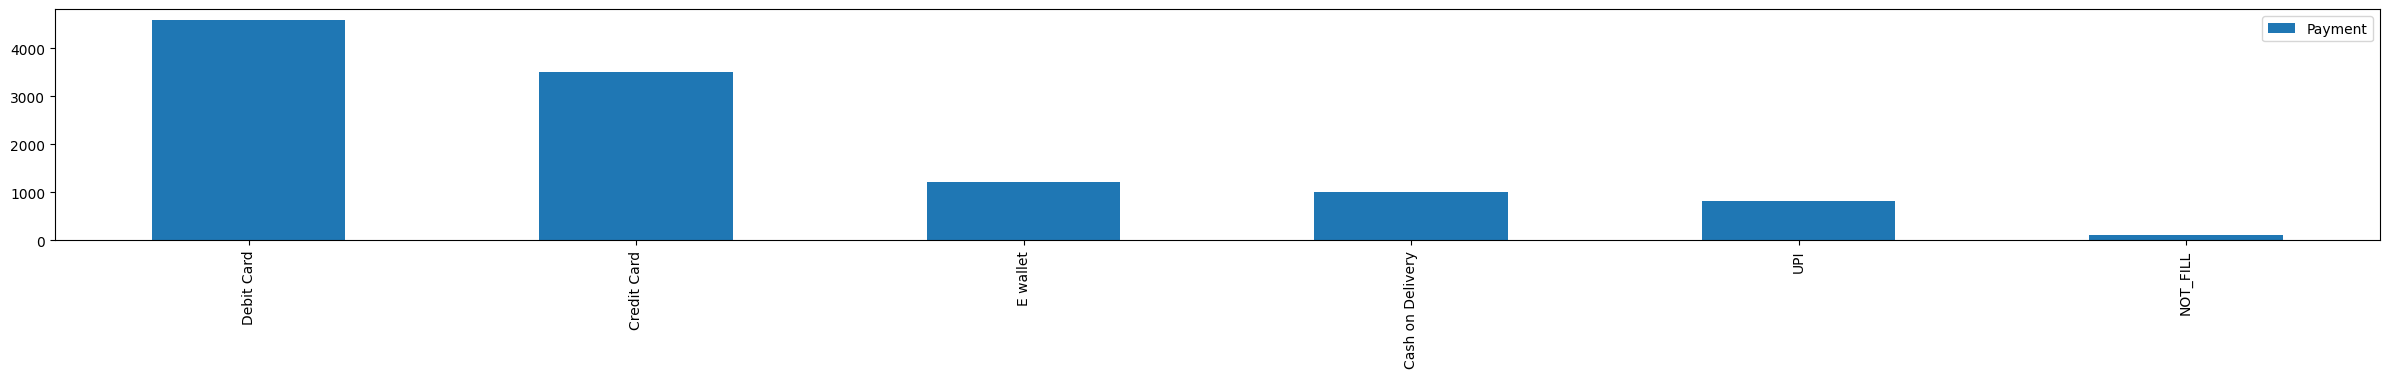

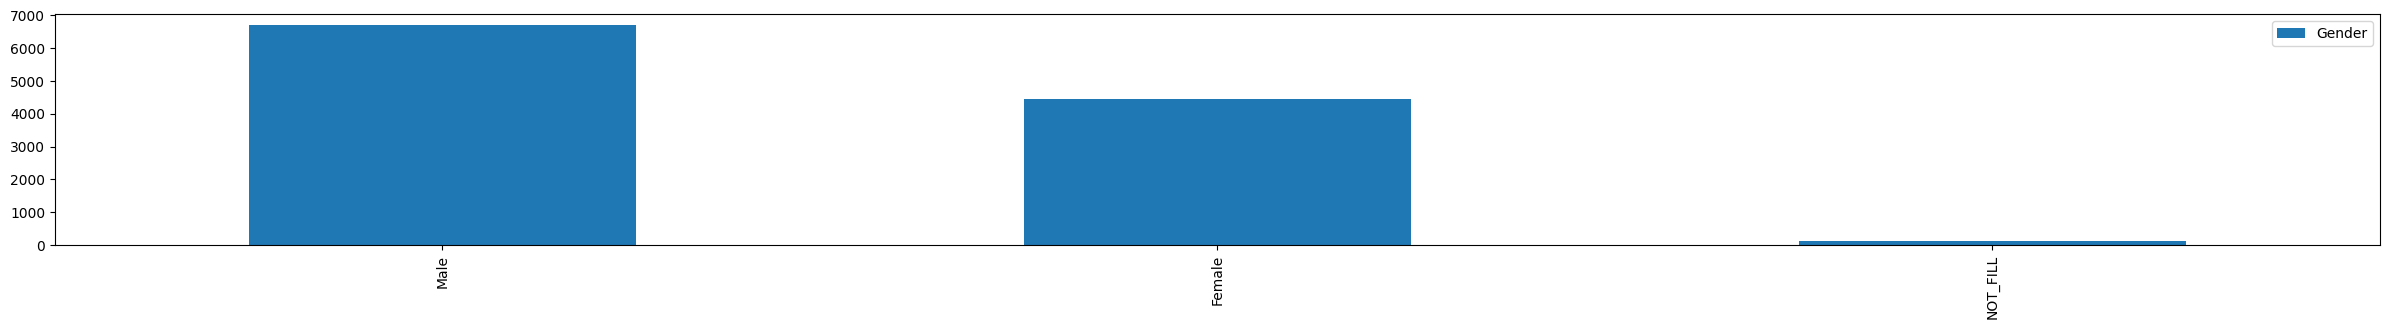

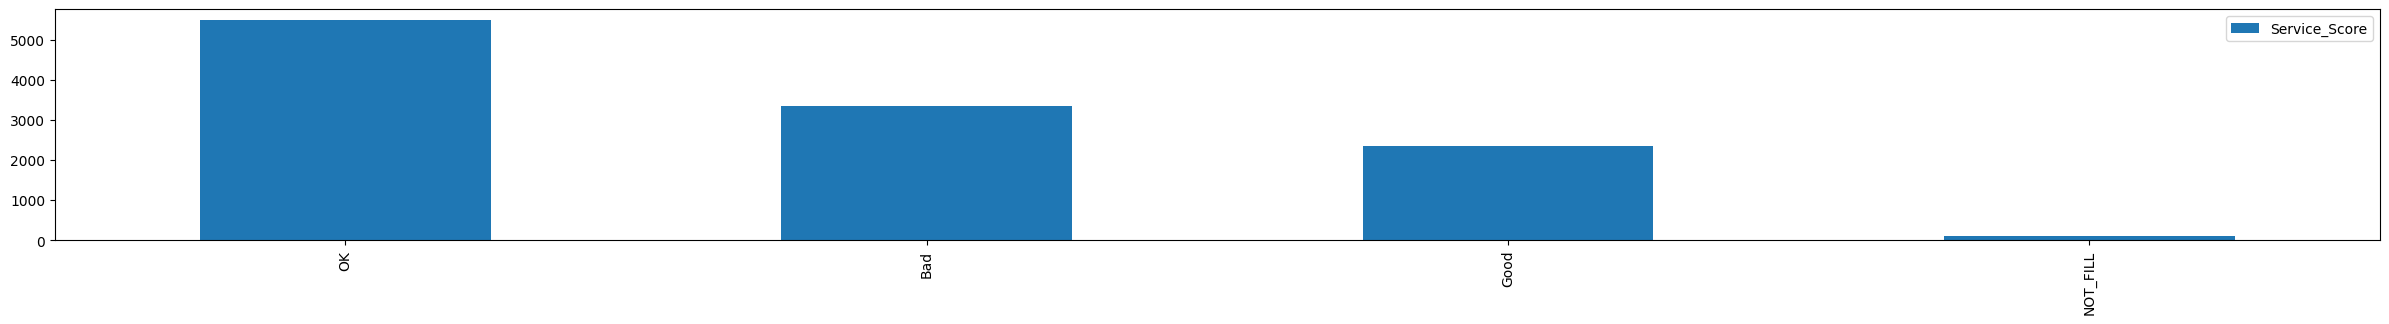

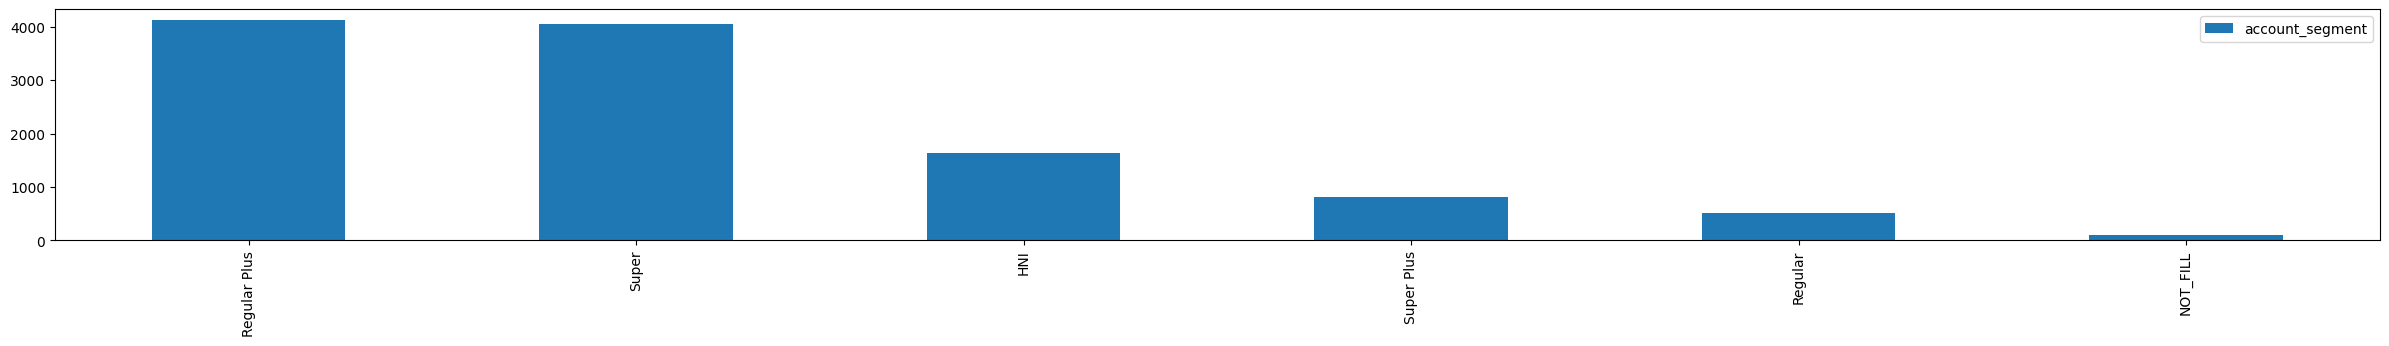

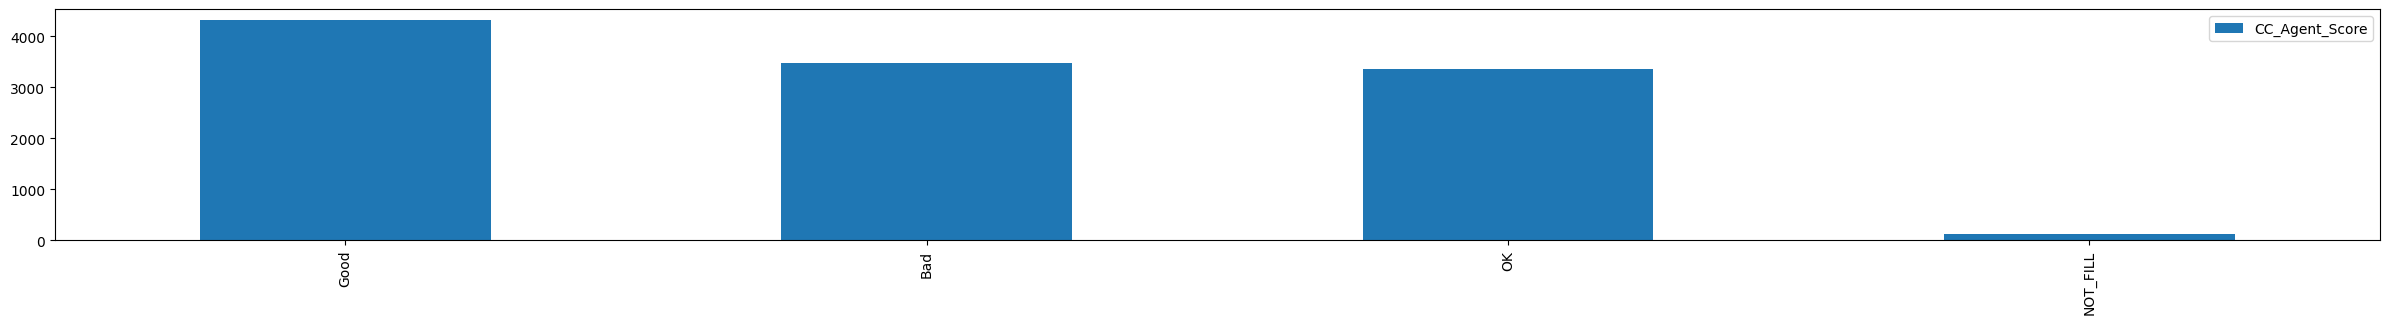

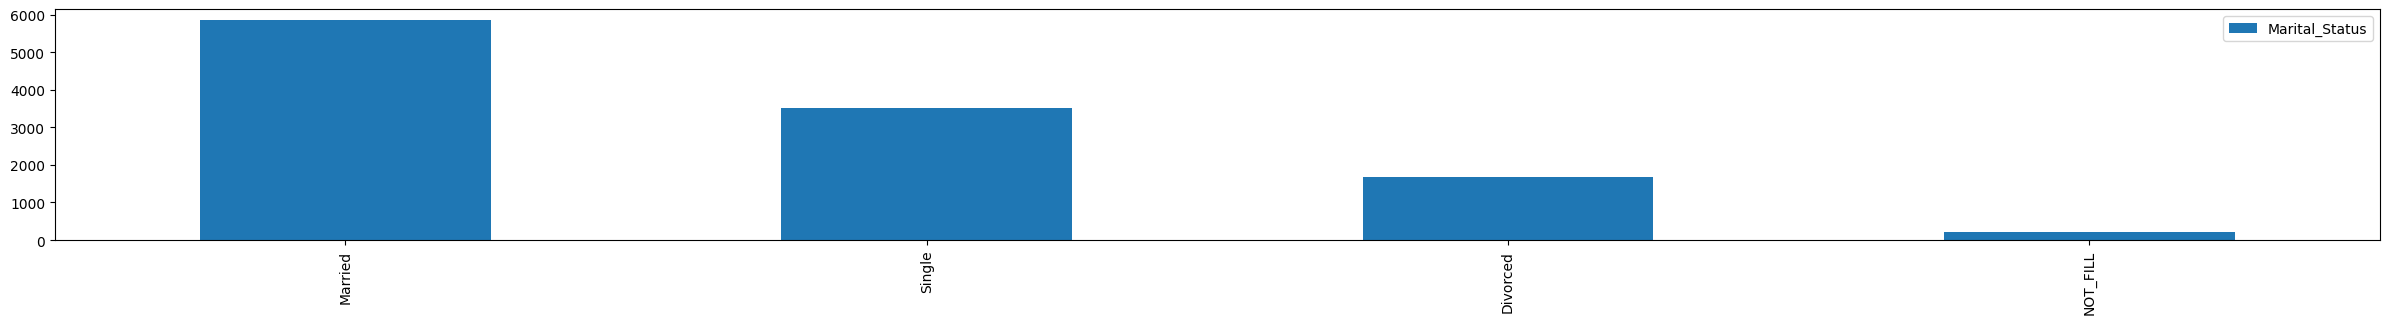

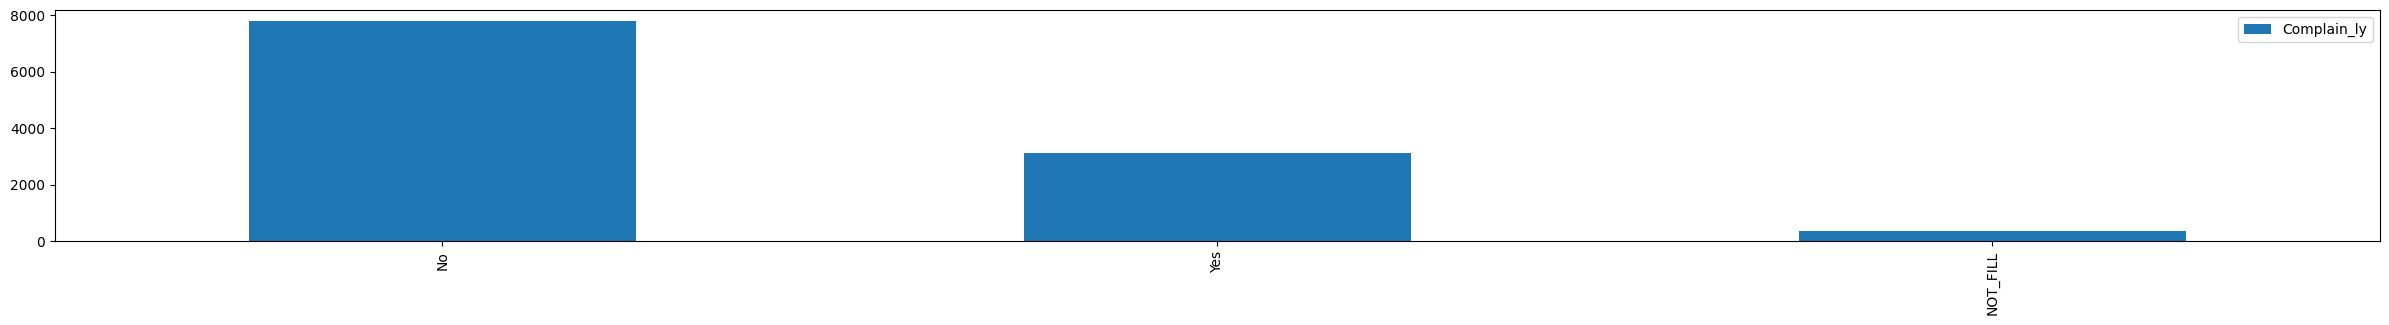

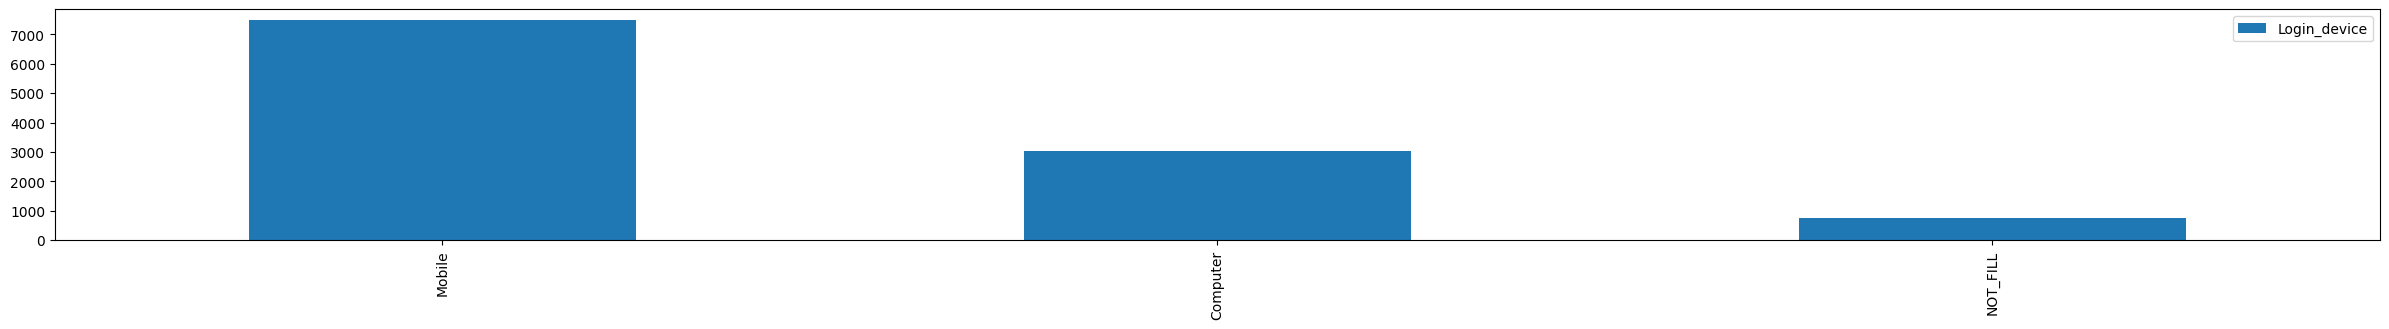

In [50]:
for col in categorical_cols:
    _bar_plot(customers, col)

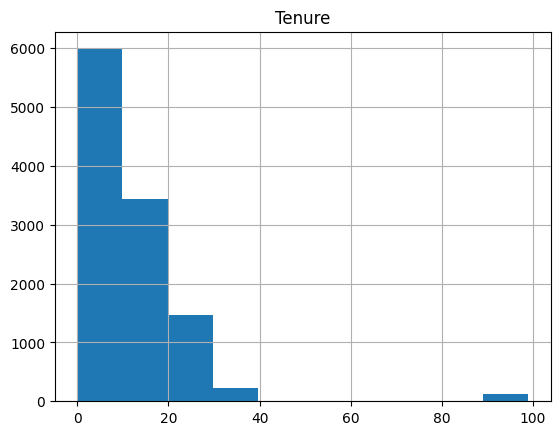

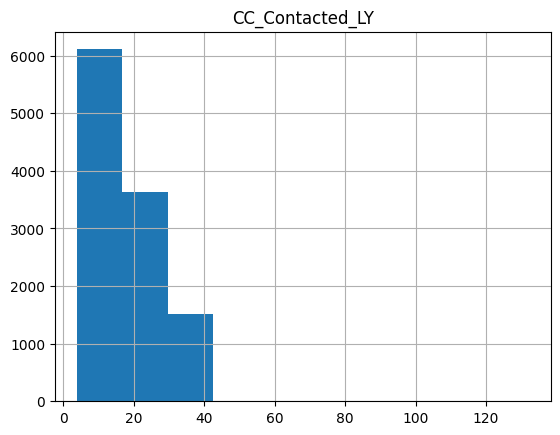

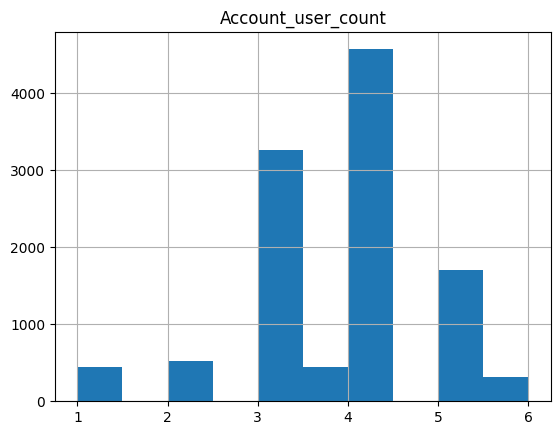

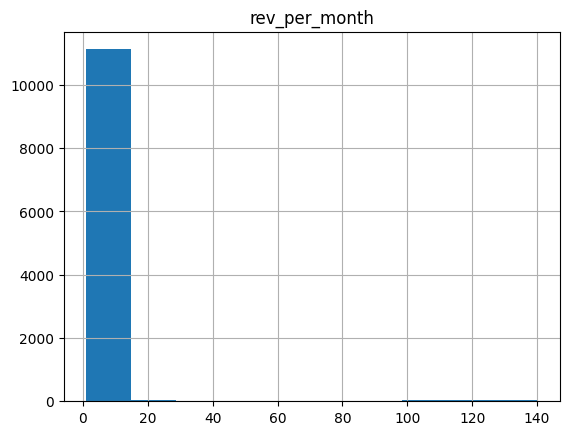

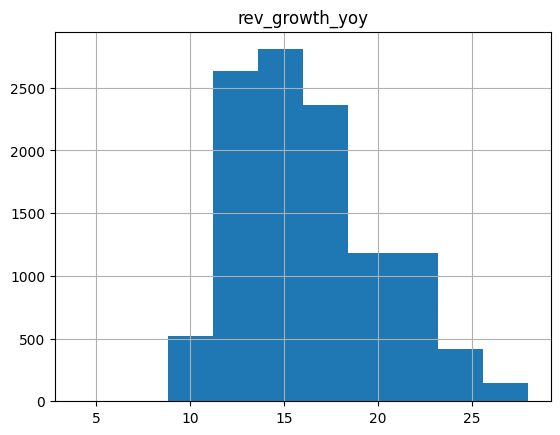

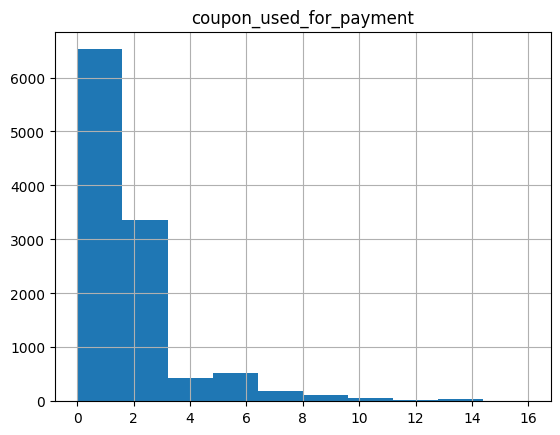

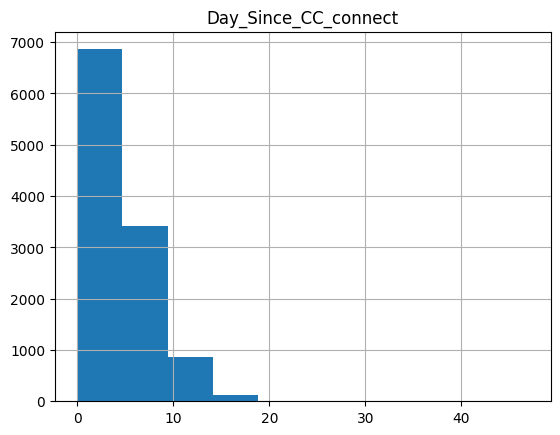

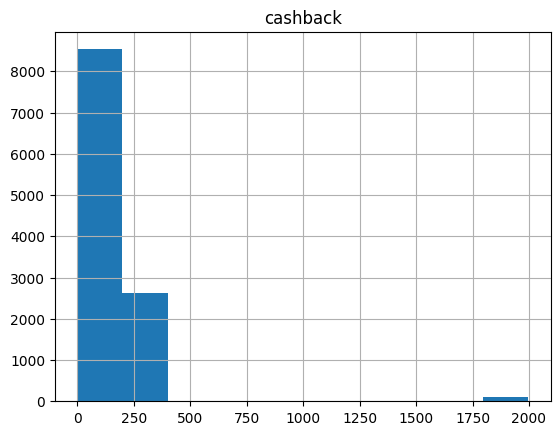

In [51]:
for col in numerical_cols:
  customers[col].hist()
  plt.title(col)
  plt.show()

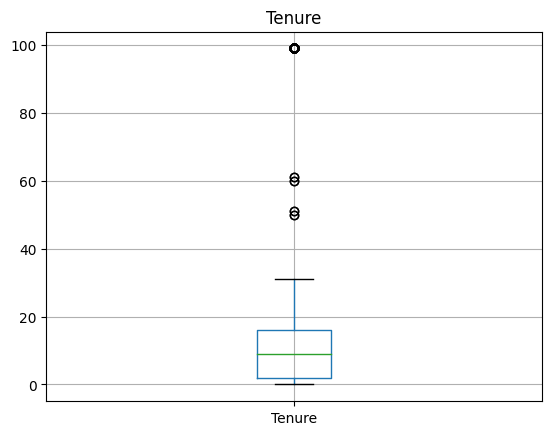

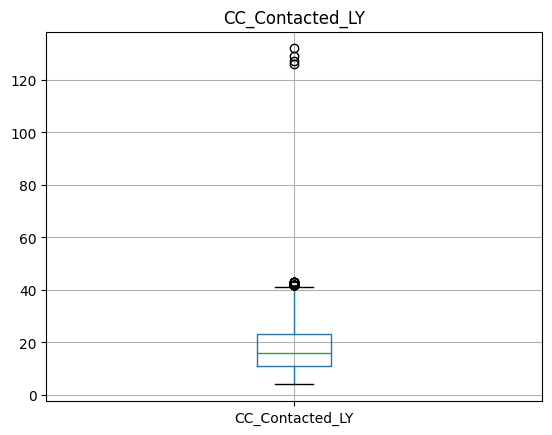

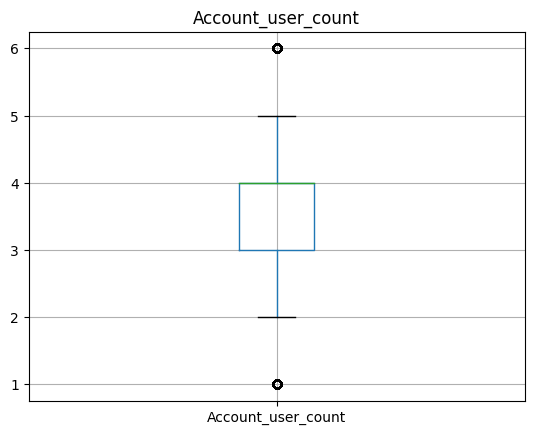

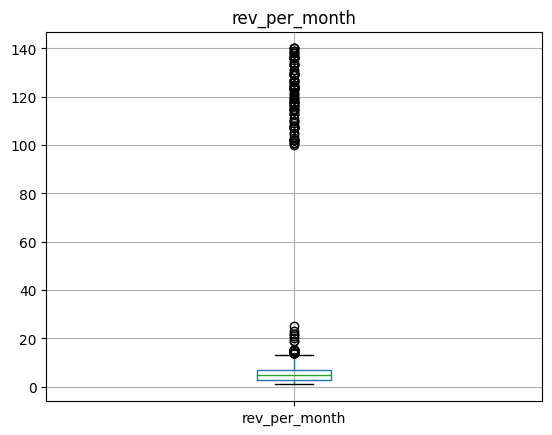

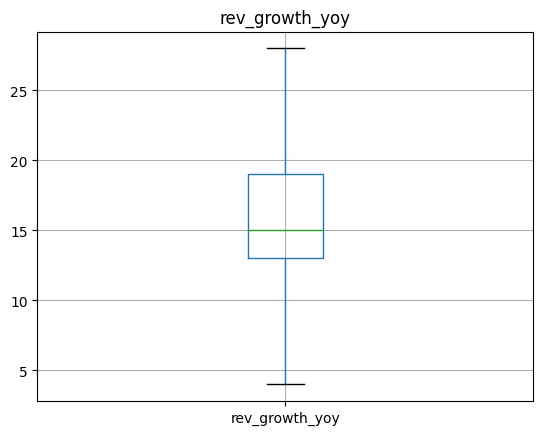

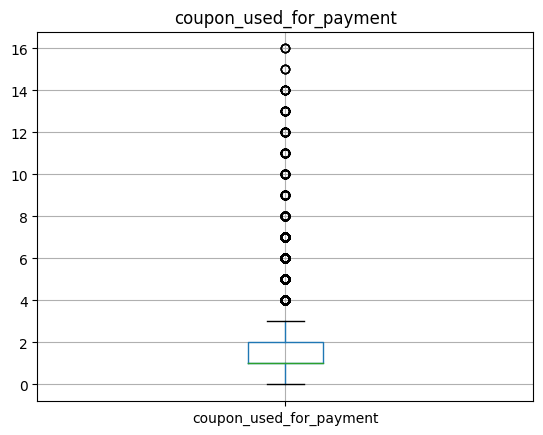

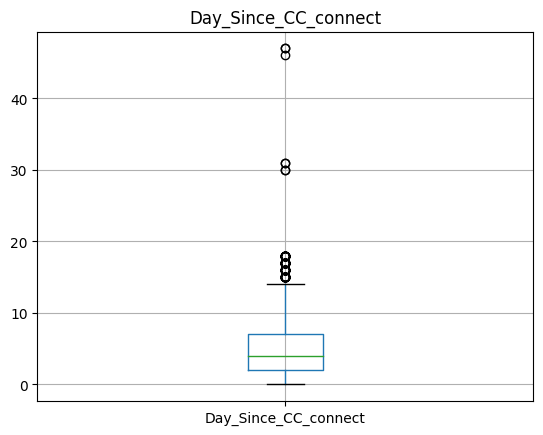

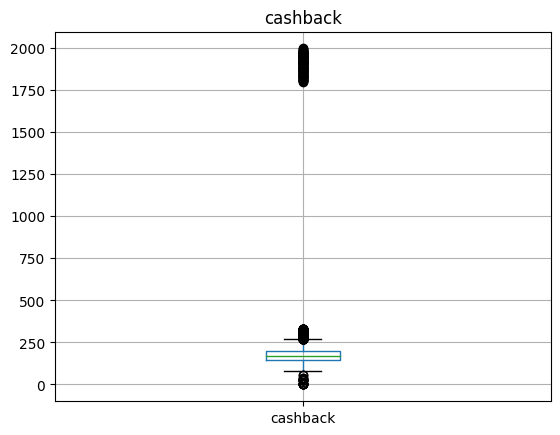

In [52]:
for col in numerical_cols:
  customers.boxplot(column=[col])
  plt.title(col)
  plt.show()

In [53]:
corr = customers[numerical_cols].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\daman\AppData\Local\Temp\ipykernel_9168\4273581110.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Tenure,1.00,-0.00,-0.00,0.03,0.02,0.09,0.12,0.08
CC_Contacted_LY,-0.00,1.00,0.02,0.02,0.07,0.00,0.01,0.00
Account_user_count,-0.00,0.02,1.00,0.02,0.07,0.14,0.04,0.04
rev_per_month,0.03,0.02,0.02,1.00,0.02,0.02,-0.00,0.00
rev_growth_yoy,0.02,0.07,0.07,0.02,1.00,0.02,0.00,-0.00
coupon_used_for_payment,0.09,0.00,0.14,0.02,0.02,1.00,0.35,0.07
Day_Since_CC_connect,0.12,0.01,0.04,-0.00,0.00,0.35,1.00,0.08
cashback,0.08,0.00,0.04,0.00,-0.00,0.07,0.08,1.00


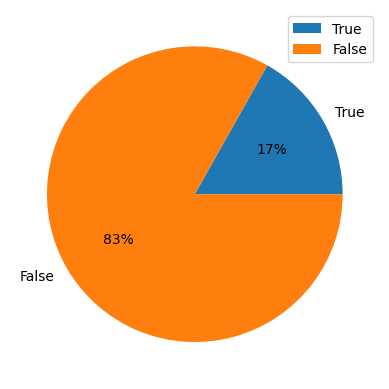

In [54]:
true_labels = customers[customers["Churn"] == 1]['Churn'].count()
false_labels = customers[customers["Churn"] == 0]['Churn'].count()
plt.pie(np.array([true_labels, false_labels]), labels = ["True", "False"], autopct='%1.0f%%')
plt.legend()
plt.show() 

In [55]:
print("True", true_labels)
print("False", false_labels)

True 1896
False 9364


In [56]:
def bar_plot(df, feature, target = 'Churn'):
    temp_df = pd.DataFrame(df.groupby(feature).agg(
        Yes = (target, lambda x: sum(x == 1)),
        No = (target, lambda x: sum(x == 0))
        )
    )

    temp_df = temp_df.reset_index()

    X_axis = np.arange(len(temp_df[feature]))

    plt.figure(figsize=(10,2))
    plt.bar(X_axis - 0.2, temp_df['Yes'], 0.4, label = 'Yes')
    plt.bar(X_axis + 0.2, temp_df['No'], 0.4, label = 'No')
    
    plt.xticks(X_axis, temp_df[feature])
    plt.xlabel(feature)
    plt.ylabel("Number of " + target)
    plt.title("Number of " + target + " by " + feature)
    plt.legend()
    plt.show()


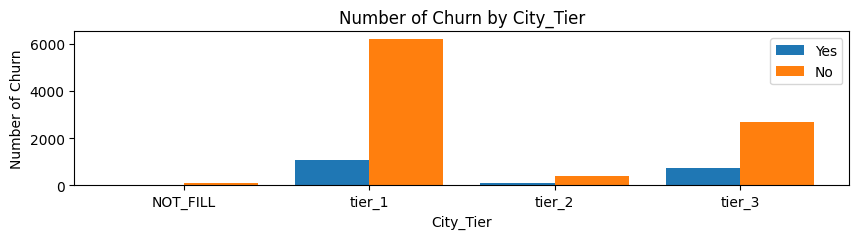

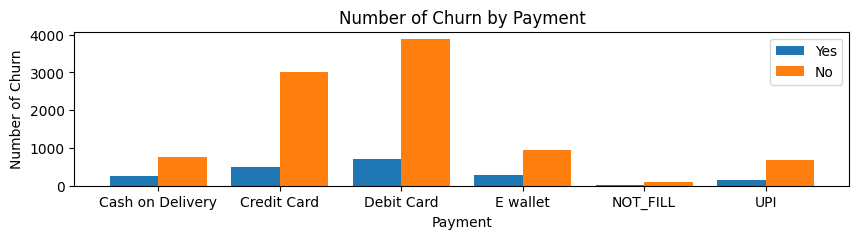

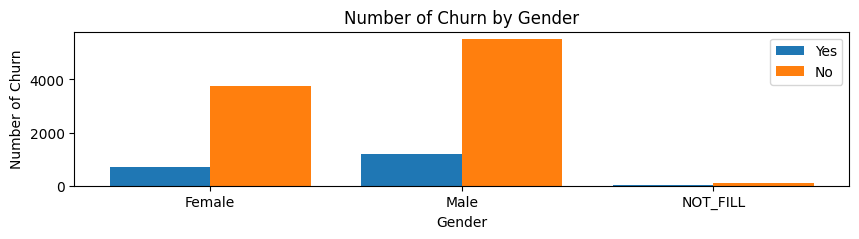

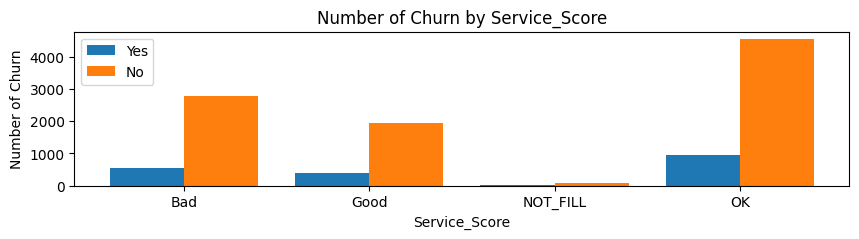

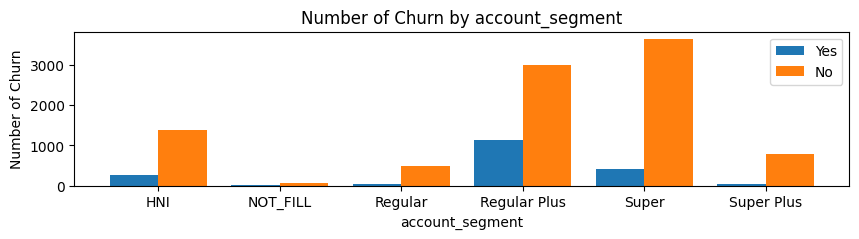

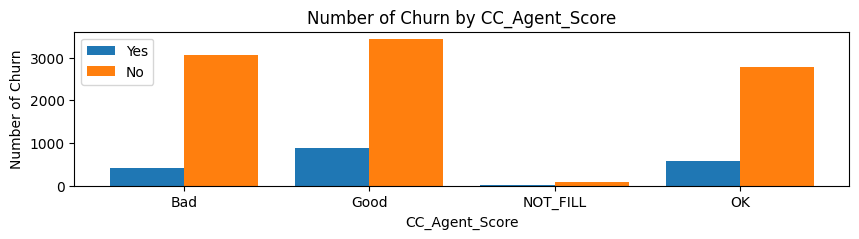

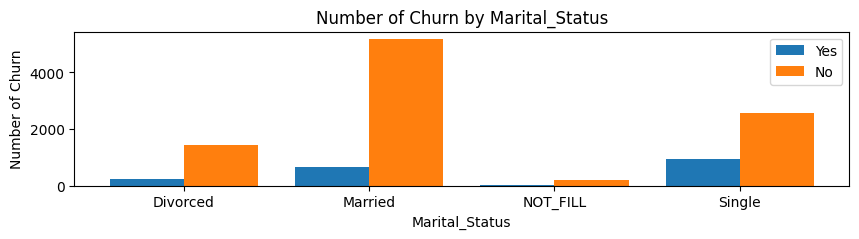

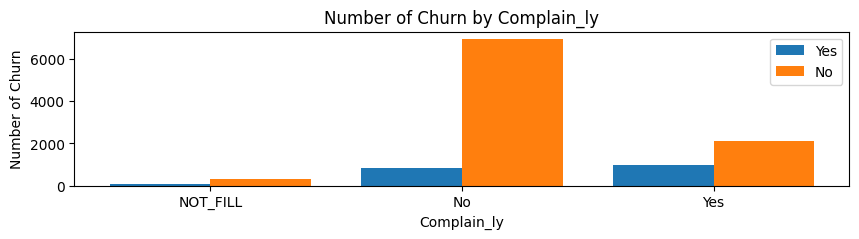

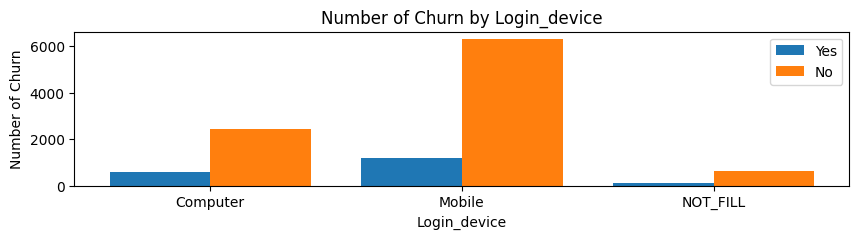

In [57]:
for col in categorical_cols:
    bar_plot(customers, col)

In [58]:
customers.to_csv('data_preprocessed.csv', index=None)